# Premier league analysis from 2010/11 - 2019/20 seasons

This project probes different football datasets to gain insight on football trends and serves as my first project to upload on GitHub. 

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.min_rows', 100)

url = "https://raw.githubusercontent.com/tara-nguyen/english-premier-league-datasets-for-10-seasons/main/epldat10seasons/epl-allseasons-matchstats.csv"
df = pd.read_csv(url)
print(df.isna().sum())
print(df.tail(5))

Season               0
Date                 0
Referee              0
HomeTeam             0
AwayTeam             0
FullTime             0
Halftime             0
HomeGoals            0
HomeGoalsHalftime    0
HomeShots            0
HomeShotsOnTarget    0
HomeCorners          0
HomeFouls            0
HomeYellowCards      0
HomeRedCards         0
AwayGoals            0
AwayGoalsHalftime    0
AwayShots            0
AwayShotsOnTarget    0
AwayCorners          0
AwayFouls            0
AwayYellowCards      0
AwayRedCards         0
dtype: int64
       Season        Date     Referee     HomeTeam          AwayTeam FullTime  \
3795  2019/20  2020-07-26  M Atkinson    Leicester        Man United  AwayWin   
3796  2019/20  2020-07-26    C Pawson     Man City           Norwich  HomeWin   
3797  2019/20  2020-07-26    A Taylor    Newcastle         Liverpool  AwayWin   
3798  2019/20  2020-07-26    P Bankes  Southampton  Sheffield United  HomeWin   
3799  2019/20  2020-07-26    M Oliver     West Ham   

Next we find the percentage of games where a team has been two goals up by half time but did not go on to win. Columns we need are 'HomeGoalsHalftime', 'AwayGoalsHalftime', 'Halftime', 'Fulltime'. We will isolate the observations where 'HomeGoalsHalftime' and 'AwayGoalsHalftime' differ by 2 or more goals but 'Halftime' is not equal to 'Fulltime'. We will store these observations in a dataframe called 'two_up_not_win_df'. 

In [36]:
#df.dtypes
#df.isna().sum()

In [31]:
two_up_at_halftime_df = df[(df.HomeGoalsHalftime >= df.AwayGoalsHalftime + 2) | 
                           (df.HomeGoalsHalftime + 2 <= df.AwayGoalsHalftime)]

two_up_at_halftime_df[['HomeGoalsHalftime', 'AwayGoalsHalftime']].head()

,HomeGoalsHalftime,AwayGoalsHalftime
0,2,0
3,2,0
6,0,3
7,2,0
9,2,0


In [38]:
two_up_not_win_df = two_up_at_halftime_df[two_up_at_halftime_df.Halftime != two_up_at_halftime_df.FullTime]

two_up_not_win_df[['FullTime', 'Halftime', 'HomeGoalsHalftime', 'AwayGoalsHalftime', 'HomeGoals', 'AwayGoals']].head(10)

,FullTime,Halftime,HomeGoalsHalftime,AwayGoalsHalftime,HomeGoals,AwayGoals
74,Draw,HomeWin,2,0,2,2
75,Draw,AwayWin,0,2,2,2
130,AwayWin,HomeWin,2,0,2,3
231,AwayWin,HomeWin,2,0,2,3
247,Draw,AwayWin,0,4,4,4
261,Draw,HomeWin,3,0,3,3
289,Draw,AwayWin,0,2,2,2
304,AwayWin,HomeWin,2,0,2,4
368,HomeWin,AwayWin,0,2,3,2
375,Draw,HomeWin,2,0,3,3


In [52]:
percentage_1 = round(len(two_up_not_win_df.index) / len(df.index), 4)
percentage_2 = round(len(two_up_at_halftime_df.index) / len(df.index), 4)
percentage_3 = round(len(two_up_not_win_df.index) / len(two_up_at_halftime_df.index), 4)

print(f"The percentage of games where a team has been two goals up at half time is {percentage_2}%.")
print(f"The percentage of games where a team has not won given that they had been two goals up at half time is {percentage_3}%.")
print(f"The percentage of games where a team had been two goals up at half time but did not win is {percentage_1}%.")

The percentage of games where a team has been two goals up at half time is 0.1803%.
The percentage of games where a team has not won given that they had been two goals up at half time is 0.0686%.
The percentage of games where a team had been two goals up at half time but did not win is 0.0124%.


The last percentage is smaller than the true percentage of games played where a team has been goals up at any time but did not go on to win the game.

### Finding these percentages for each season

In [53]:
season_list = df.Season.unique()
print(season_list)

['2010/11' '2011/12' '2012/13' '2013/14' '2014/15' '2015/16' '2016/17'
 '2017/18' '2018/19' '2019/20']


In [54]:
two_up_not_win_percentage_list_for_each_season = []
for season in season_list:
    percentage = round(len(two_up_not_win_df[two_up_not_win_df.Season == season].index) / len(df[df.Season == season].index), 4)
    two_up_not_win_percentage_list_for_each_season.append(percentage)

two_up_not_win_percentage_list_for_each_season

[0.0263,
 0.0079,
 0.0132,
 0.0079,
 0.0105,
 0.0184,
 0.0079,
 0.0132,
 0.0079,
 0.0105]

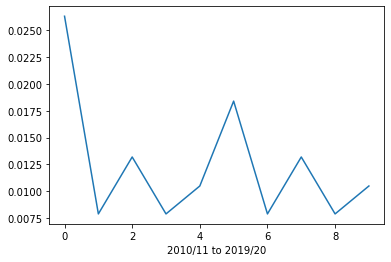

In [59]:
plt.plot(two_up_not_win_percentage_list_for_each_season)
plt.title('Plot showing percentage of games where a team was 2 goals up at half time but did not win, for ea')
plt.xlabel('2010/11 to 2019/20 seasons')
plt.show()